In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
n = 500
t = np.linspace(0,20.0*np.pi,n)
X = np.sin(t) # X is already between -1 and 1, scaling normally needed


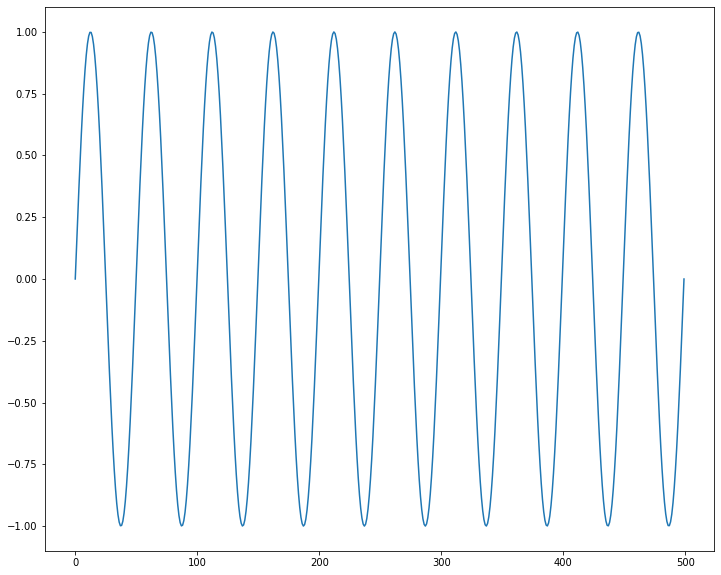

In [40]:
plt.figure(figsize=(12,10))
plt.plot(X)

In [41]:
X[0:70]

array([ 0.        ,  0.12558307,  0.24917769,  0.36882689,  0.48263615,
        0.58880346,  0.68564779,  0.77163571,  0.84540571,  0.90578975,
        0.9518317 ,  0.98280255,  0.99821192,  0.99781582,  0.98162051,
        0.94988243,  0.90310412,  0.84202625,  0.76761592,  0.68105132,
        0.5837031 ,  0.47711265,  0.3629677 ,  0.2430756 ,  0.11933469,
       -0.00629574, -0.13182648, -0.25526991, -0.37467145, -0.48814053,
       -0.59388049, -0.69021707, -0.77562491, -0.84875167, -0.90843947,
       -0.95374324, -0.98394564, -0.99856846, -0.99738016, -0.98039956,
       -0.94789551, -0.9003827 , -0.83861341, -0.76356571, -0.67642786,
       -0.5785796 , -0.47157024, -0.35709413, -0.23696388, -0.11308158,
        0.01259122,  0.13806466,  0.26135201,  0.38050117,  0.49362555,
        0.59893397,  0.694759  ,  0.77958337,  0.85206398,  0.91105319,
        0.95561698,  0.98504973,  0.99888542,  0.99690497,  0.97913974,
        0.94587102,  0.89762559,  0.83516734,  0.75948523,  0.67

In [0]:
# Set window of past points for LSTM model
window = 10

# Split 80/20 into train/test data
last = int(n/5.0)
Xtrain = X[:-last]
Xtest = X[-last-window:]

# Store window number of points as a sequence
xin = []
next_X = []
for i in range(window,len(Xtrain)):
    xin.append(Xtrain[i-window:i])
    next_X.append(Xtrain[i])

# Reshape data to format for LSTM
xin, next_X = np.array(xin), np.array(next_X)
xin_red = xin.reshape(xin.shape[0], xin.shape[1], 1)

In [60]:
xin[0]

array([0.        , 0.12558307, 0.24917769, 0.36882689, 0.48263615,
       0.58880346, 0.68564779, 0.77163571, 0.84540571, 0.90578975])

In [61]:
xin[1]

array([0.12558307, 0.24917769, 0.36882689, 0.48263615, 0.58880346,
       0.68564779, 0.77163571, 0.84540571, 0.90578975, 0.9518317 ])

In [62]:
xin[2]

array([0.24917769, 0.36882689, 0.48263615, 0.58880346, 0.68564779,
       0.77163571, 0.84540571, 0.90578975, 0.9518317 , 0.98280255])

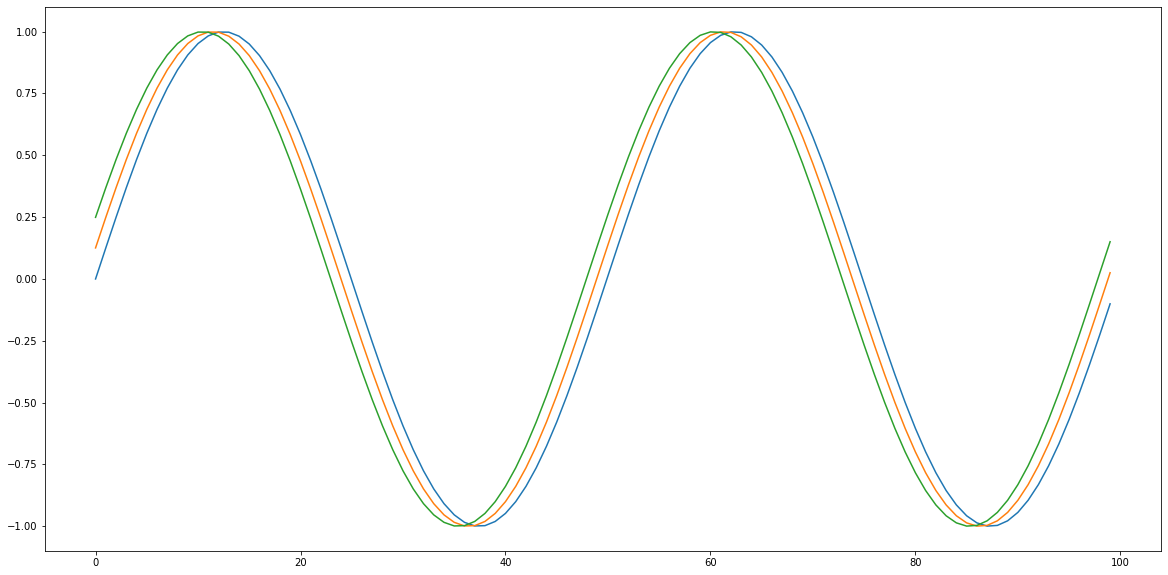

In [58]:
plt.figure(figsize=(20,10))
plt.plot(xin[0:100,0])
plt.plot(xin[0:100,1])
plt.plot(xin[0:100,2])

In [43]:
xin_red.shape

(390, 10, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialize LSTM model
m = Sequential()
m.add(LSTM(units=100, return_sequences=True, input_shape=(xin.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units=100))
m.add(Dropout(0.2))
m.add(Dense(units=1))
m.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/50
390/390 [==============================] - 1s 3ms/step - loss: 0.2871
Epoch 2/50
390/390 [==============================] - 0s 931us/step - loss: 0.1524
Epoch 3/50
390/390 [==============================] - 0s 949us/step - loss: 0.0589
Epoch 4/50
390/390 [==============================] - 0s 928us/step - loss: 0.0155
Epoch 5/50
390/390 [==============================] - 0s 972us/step - loss: 0.0079
Epoch 6/50
390/390 [==============================] - 0s 971us/step - loss: 0.0058
Epoch 7/50
390/390 [==============================] - 0s 922us/step - loss: 0.0056
Epoch 8/50
390/390 [==============================] - 0s 973us/step - loss: 0.0043
Epoch 9/50
390/390 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 10/50
390/390 [==============================] - 0s 925us/step - loss: 0.0038
Epoch 11/50
390/390 [==============================] - 0s 949us/step - loss: 0.0035
Epoch 12/50
390/390 [==============================] - 0s 951us/step - loss: 0.0044
Epoch

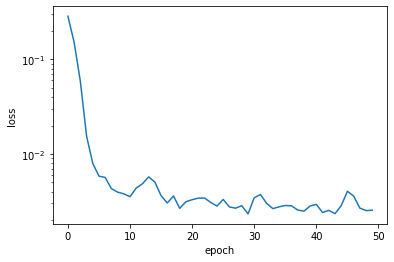

In [18]:
# Fit LSTM model
history = m.fit(xin, next_X, epochs = 50, batch_size = 32,verbose=1)

plt.figure()
plt.ylabel('loss'); plt.xlabel('epoch')
plt.semilogy(history.history['loss'])

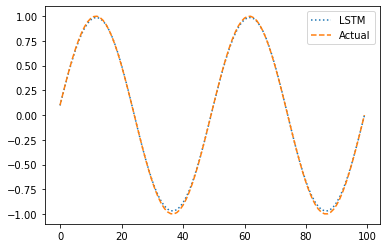

In [19]:
# Store "window" points as a sequence
xin = []
next_X1 = []
for i in range(window,len(Xtest)):
    xin.append(Xtest[i-window:i])
    next_X1.append(Xtest[i])

# Reshape data to format for LSTM
xin, next_X1 = np.array(xin), np.array(next_X1)
xin = xin.reshape((xin.shape[0], xin.shape[1], 1))

# Predict the next value (1 step ahead)
X_pred = m.predict(xin)

# Plot prediction vs actual for test data
plt.figure()
plt.plot(X_pred,':',label='LSTM')
plt.plot(next_X1,'--',label='Actual')
plt.legend()

#forecasting

In [0]:
# Using predicted values to predict next step
X_pred = Xtest.copy()
for i in range(window,len(X_pred)):
    xin = X_pred[i-window:i].reshape((1, window, 1))
    X_pred[i] = m.predict(xin)



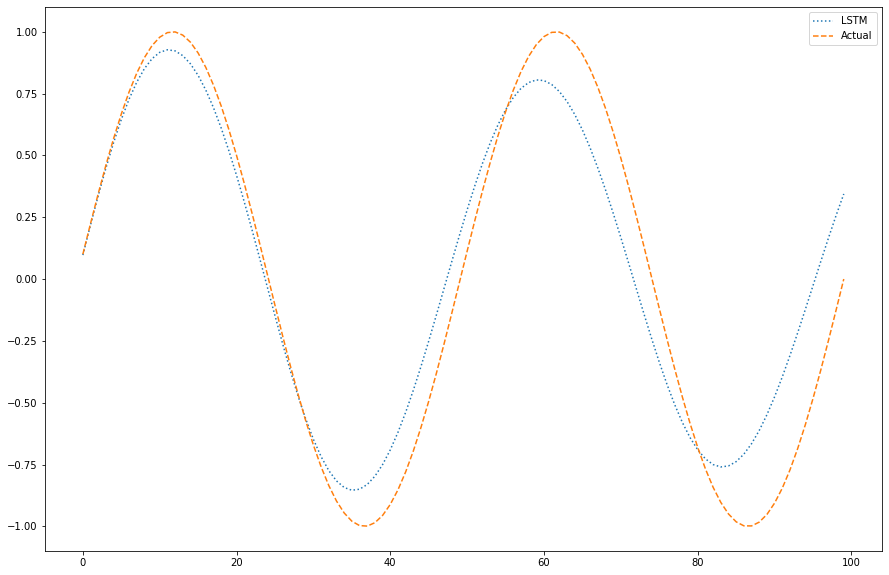

In [35]:
# Plot prediction vs actual for test data
plt.figure(figsize=(15,10))
plt.plot(X_pred[window:],':',label='LSTM')
plt.plot(next_X1,'--',label='Actual')
plt.legend()

In [0]:
import pandas as pd

In [0]:
df1_HTNLOS = pd.read_csv('/content/drive/My Drive/Mediciones en csv/HTNLOS CSV/potencia 2000-01-02 19_3A20_3A43 Antenna Horn Time 300[s] SwitchingBy 0 Horn 0 Omni 0 ING-AU_024.csv', header = None)

In [0]:
data20 = df1_HTNLOS.values

In [0]:
tiempo=data20[0:len(data20),0]

In [0]:
Potencia1_HTNLOS = data20[0:len(data20),1]

Text(0.5, 0, 'Tiempo [s]')

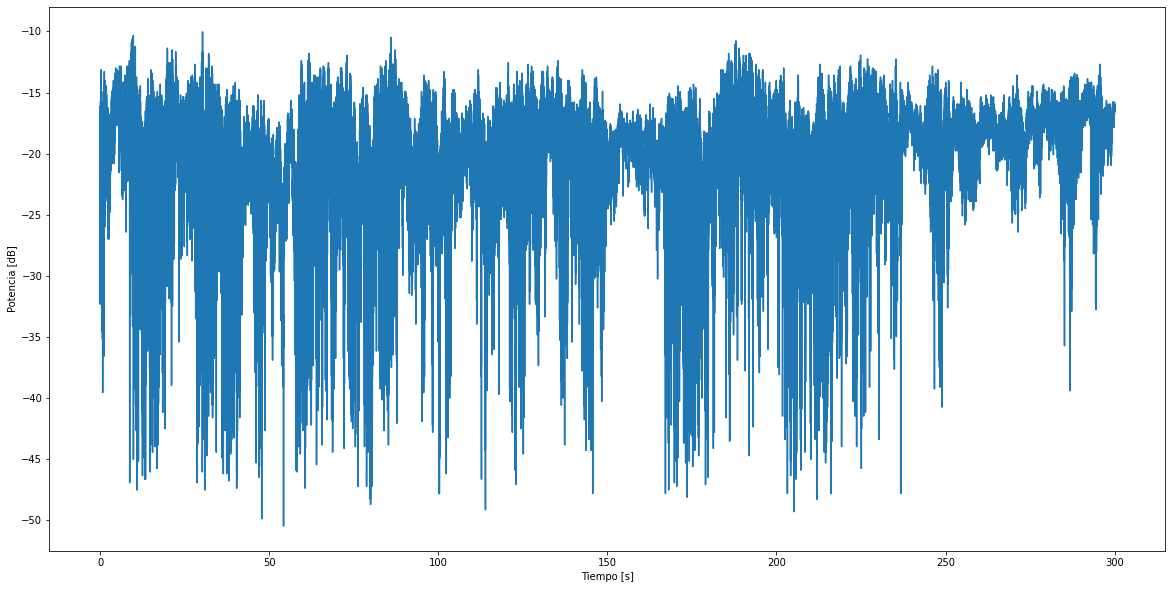

In [32]:
plt.figure(figsize=(20,10))
plt.plot(tiempo,Potencia1_HTNLOS)
plt.ylabel('Potencia [dB]')
plt.xlabel('Tiempo [s]')